# Analyzing Social Media's Impact on Mental Health

## Motivation and Problem Statement 

Social media has become a central part of daily life. Social media allows for connection and information sharing but there have been growing concerns regarding the impact social media has on user's mental health. Some studies show that certain types of social media usage have a positive correlation with increased anxiety, stress, and a decrease in self-esteem. 

The goal of this project is to explore how social media usage is associated with mental health. From a Human-Centered perspective, understanding this relationship can help inform mental health educators and promote healthier digital habits. This analysis can also provide insight for individuals to self-regulate their social media usage. I want to identify patterns and behaviors that may be associated with positive or negative mental health outcomes. 

## Data Selected for Analysis 

The dataset that I want to use is the "Social Media and Mental Health" dataset on Kaggle. This dataset has survey responses on various aspects of social media and mental health indicators. It also contains demographic information which can give insights across age groups and gender. 

[Link to the Dataset](https://www.kaggle.com/datasets/souvikahmed071/social-media-and-mental-health)

This dataset is available under the Creative Commons License. 

I think this dataset is suitable for my research goal because it contains both social media and mental health indicators which is the main part of my analysis. 

One ethical consideration is that since the data in the dataset is all self-reported, participants may under-report or over-report  their social media usage and mental health status.  

## Unknowns and Dependencies 

There are a couple of unknowns and dependencies. First is that because the data is all self-reported, there may be biased that affect the accuracy of my findings. Second, there may be missing data that could require extra cleaning. Third, is that the dataset is not really clear on what types of content is consumed on the apps which could effect the results. 

## Overview 

This project aims to investigate the relationship between social media usage patterns and mental health. By analyzing survey data on social media usage and mental health indicators, the goal is to find patterns of how social media use may correlate with positive or negative mental health. Insights from this research could help individuals regulate their social media usage and make healthier digital habits. 

## Research Questions 

1. How does the amount of time spent on social media correlate with mental health? 
2. Does the platform used impact mental health differently? 
3. Are there differences in mental health impacts of social media based on demographic factors? 


## Background and Related Work 

social media's impact on mental health has been a hot topic with multiple studies showing both positive and negative correlations. Research studies have shown that prolonged use of social media can be associated with higher levels of depression and loneliness. It was also found that teenagers who spent more than three hours a day on social media felt isolated (https://pmc.ncbi.nlm.nih.gov/articles/PMC6214874/). 

On the other hand, some studies have shown that social media has some positive effects. Some users reported feeling more connected and supported, being able to reach out to their friends and keep up with their lives through their posts (https://academic.oup.com/joc/article/71/1/56/6124731?login=false). To me, these mixed findings mean that social media can impact mental health depending on how it is used and the content the users are watching. 

The previous studies will influence my decisions on this study because they suggest specific factors and demographics to study. Specifically looking at time spent, usage type, platform type, feedback, age, gender, cultural background, and education level.  


## Methodology 

My methodology to investigate this data and present my findings will have multiple steps. First, I will clean and prepare the data. For this dataset, it means renaming the columns because some of them have long names which could make the code messy, and dealing with missing values. 

Once the data is cleaned and ready, I will calculate some descriptive statistics to get an overview of the dataset. Statistics like mean, median, and standard deviation could help set a baseline and help with analysis. I then plan to create a correlation matrix to highlight any correlations between variables. I also plan to use linear regression to construct a model to examine the coefficients and understand how each of the different factors correlates with mental health. 

I also plan to create some visualizations as well. I will use a heatmap to show the correlations between different variables, and a bar chart to visualize the differences in mental health outcomes across different usage patterns or demographic groups. 

I think these methods are good for this study because they allow us to see the overview of relationships through correlations and visualizations and get an in-depth look at how specific behaviors are linked to mental health outcomes through regression. 

# Data Analysis


### Data Preprocessing  

First get all of the relevant imports for the analysis

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math 


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score



Load in the data, and check the first five rows to see what is in the dataset

In [15]:
data = pd.read_csv("smmh.csv")

data.head(5)


,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


Check the shape of the dataset to see how many rows and columns are in the dataset

In [16]:
data.shape

(481, 21)

### Working with the Columns

When looking at all of the columns in the dataset, we can see that columns 5 through 20 are very long. Renaming the columns will make the data analysis easier 

In [17]:
data.columns

Index(['Timestamp', '1. What is your age?', '2. Gender',
       '3. Relationship Status', '4. Occupation Status',
       '5. What type of organizations are you affiliated with?',
       '6. Do you use social media?',
       '7. What social media platforms do you commonly use?',
       '8. What is the average time you spend on social media every day?',
       '9. How often do you find yourself using Social media without a specific purpose?',
       '10. How often do you get distracted by Social media when you are busy doing something?',
       '11. Do you feel restless if you haven't used Social media in a while?',
       '12. On a scale of 1 to 5, how easily distracted are you?',
       '13. On a scale of 1 to 5, how much are you bothered by worries?',
       '14. Do you find it difficult to concentrate on things?',
       '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?',
       '16. Following the previous question, 

In [18]:
data.rename(columns = {'1. What is your age?':'Age','2. Gender':'Gender','3. Relationship Status':'Relationship Status',
                       '4. Occupation Status':'Occupation',
                       '5. What type of organizations are you affiliated with?':'Affiliations',
                       '6. Do you use social media?':'Social Media User?',
                       '7. What social media platforms do you commonly use?':'Platforms Used',
                       '8. What is the average time you spend on social media every day?':'Hours Per Day',
                       '9. How often do you find yourself using Social media without a specific purpose?':'ADHD Q1',
                       '10. How often do you get distracted by Social media when you are busy doing something?':'ADHD Q2',
                       "11. Do you feel restless if you haven't used Social media in a while?":'Anxiety Q1',
                       '12. On a scale of 1 to 5, how easily distracted are you?':'ADHD Q3',
                       '13. On a scale of 1 to 5, how much are you bothered by worries?':'Anxiety Q2',
                       '14. Do you find it difficult to concentrate on things?':'ADHD Q4',
                       '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?':'Self Esteem Q1',
                       '16. Following the previous question, how do you feel about these comparisons, generally speaking?':'Self Esteem Q2',
                       '17. How often do you look to seek validation from features of social media?':'Self Esteem Q3',
                       '18. How often do you feel depressed or down?':'Depression Q1',
                       '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?':'Depression Q2',
                       '20. On a scale of 1 to 5, how often do you face issues regarding sleep?':'Depression Q3' },inplace=True)

data.columns


Index(['Timestamp', 'Age', 'Gender', 'Relationship Status', 'Occupation',
       'Affiliations', 'Social Media User?', 'Platforms Used', 'Hours Per Day',
       'ADHD Q1', 'ADHD Q2', 'Anxiety Q1', 'ADHD Q3', 'Anxiety Q2', 'ADHD Q4',
       'Self Esteem Q1', 'Self Esteem Q2', 'Self Esteem Q3', 'Depression Q1',
       'Depression Q2', 'Depression Q3'],
      dtype='object')

Now the columns are shorter which will make handling the data easier. There are also some columns that I won't be needing in my analysis because they do not add information. For example, Timestamp does not add to the dataset, other than telling us when individuals took the survey. Affiliations also does not add because it tells us the same thing as Occupation.  

In [19]:
things_to_drop = ["Timestamp", "Affiliations"]
data.drop(things_to_drop, inplace=True, axis=1)
data.columns

Index(['Age', 'Gender', 'Relationship Status', 'Occupation',
       'Social Media User?', 'Platforms Used', 'Hours Per Day', 'ADHD Q1',
       'ADHD Q2', 'Anxiety Q1', 'ADHD Q3', 'Anxiety Q2', 'ADHD Q4',
       'Self Esteem Q1', 'Self Esteem Q2', 'Self Esteem Q3', 'Depression Q1',
       'Depression Q2', 'Depression Q3'],
      dtype='object')

After dropping the columns, I realized that some of the columns are out of order. For example, ADHD Q1, ADHD Q2, Anxiety Q1, ADHD Q3, Anxiety Q2, and ADHD Q4 should be grouped by their categories. 

In [20]:
columns = list(data.columns)
columns[9], columns[10] = columns[10], columns[9]
columns[11], columns[12] = columns[12], columns[11]
columns[10], columns[11] = columns[11], columns[10]
data = data[columns]
data.columns

Index(['Age', 'Gender', 'Relationship Status', 'Occupation',
       'Social Media User?', 'Platforms Used', 'Hours Per Day', 'ADHD Q1',
       'ADHD Q2', 'ADHD Q3', 'ADHD Q4', 'Anxiety Q1', 'Anxiety Q2',
       'Self Esteem Q1', 'Self Esteem Q2', 'Self Esteem Q3', 'Depression Q1',
       'Depression Q2', 'Depression Q3'],
      dtype='object')

### Missing Values

Next, I wanted to check to see if there were any missing values in the dataset. After checking the dataset, there are no missing values in the columns

In [21]:
missing_values = data.isna().sum()
missing_values

Age                    0
Gender                 0
Relationship Status    0
Occupation             0
Social Media User?     0
Platforms Used         0
Hours Per Day          0
ADHD Q1                0
ADHD Q2                0
ADHD Q3                0
ADHD Q4                0
Anxiety Q1             0
Anxiety Q2             0
Self Esteem Q1         0
Self Esteem Q2         0
Self Esteem Q3         0
Depression Q1          0
Depression Q2          0
Depression Q3          0
dtype: int64

### Column Values

When I was glancing at the dataset I saw that some columns were strings because of how the data was collected. This means that they were able to enter their own values for their Gender. 

Looking at the values, I saw {'There are others???', 'Trans', 'Nonbinary ', 'Female', 'Male', 'Non-binary', 'unsure ', 'Non binary ', 'NB'}. Looking at this, I wanted to normalize the "Nonbinary" "Non-binary" "Non binary" and "NB" values into one string. 


In [22]:
for cols in data.columns:
    print(cols, set(data[cols]))

Age {26.7, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 40.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 55.0, 56.0, 60.0, 65.0, 69.0, 91.0}
Gender {'Non binary ', 'unsure ', 'Nonbinary ', 'Male', 'Female', 'Non-binary', 'There are others???', 'NB', 'Trans'}
Relationship Status {'Married', 'In a relationship', 'Divorced', 'Single'}
Occupation {'Salaried Worker', 'School Student', 'University Student', 'Retired'}
Social Media User? {'No', 'Yes'}
Platforms Used {'Facebook', 'Facebook, Instagram, YouTube, Reddit', 'Facebook, Discord, Reddit', 'YouTube, Pinterest', 'Discord, Reddit', 'Facebook, Instagram, YouTube, Discord, Pinterest, TikTok', 'Twitter, YouTube, Reddit', 'YouTube, Discord', 'YouTube, Discord, Reddit', 'Facebook, Twitter, YouTube, Discord, Reddit', 'Facebook, Instagram, YouTube, Pinterest, TikTok', 'Instagram, YouTube, Reddit, Pinterest'

In [23]:
data.replace('Non-binary','Non-Binary', inplace=True)
data.replace('Nonbinary ','Non-Binary', inplace=True)
data.replace('NB','Non-Binary', inplace=True)
data.replace('Non binary ','Non-Binary', inplace=True)
print(set(data['Gender']))

{'unsure ', 'Male', 'Female', 'There are others???', 'Non-Binary', 'Trans'}


When looking at the dataset, it also looked like the scale for Self Esteem Q2 was reversed. Every other questions follows: 

- 1 = very negative
- 2 = very positivenegative
- 3 = netral
- 4 = positive
- 5 = very positive

Question 2 asks: "Following the previous question, how do you feel about these comparisons, generally speaking?". Because of the scale that this question uses needs to be reversed 
- 5 = very negative
- 4 = slightly negative
- 3 = neutral
- 2 = slightly positive
- 1 = very positive

In [24]:
data.loc[data['Self Esteem Q2'] == 1, 'Self Esteem Q2'] = 5
data.loc[data['Self Esteem Q2'] == 2, 'Self Esteem Q2'] = 4
data.loc[data['Self Esteem Q2'] == 3, 'Self Esteem Q2'] = 3
data.loc[data['Self Esteem Q2'] == 4, 'Self Esteem Q2'] = 2
data.loc[data['Self Esteem Q2'] == 5, 'Self Esteem Q2'] = 1

Finally, I wanted to add up the different mental health screening questions to get a final score for each row/individual. Doing this will make comparisons easier. The questions are as follows: 
- 4 ADHD Questions (A possible highest total score of 20)
- 2 Anxiety Questions (A possible highest total score of 10)
- 3 Self Esteem Questions (A possible highest total score of 15)
- 3 Depression Questions (A possible highest total score of 15)

With these 12 questions, the highest total score an individual can get is 60. With this, I added a new column that calculates this total score which shows the total sum of the screening questions. I also added columns that calculated the total score for each screening category 



In [25]:
just_scores = data.copy()

ADHD = ['ADHD Q1', 'ADHD Q2', 'ADHD Q3', 'ADHD Q4']
Anxiety = ['Anxiety Q1', 'Anxiety Q2']
SelfEsteem = ['Self Esteem Q1', 'Self Esteem Q2', 'Self Esteem Q3']
Depression = ['Depression Q1', 'Depression Q2', 'Depression Q3']
Total = [ADHD, Anxiety, SelfEsteem, Depression]

just_scores["ADHD Score"] = just_scores[ADHD].sum(axis=1)
just_scores["Anxiety Score"] = just_scores[Anxiety].sum(axis=1)
just_scores["Self Esteem Score"] = just_scores[SelfEsteem].sum(axis=1)
just_scores["Depression Score"] = just_scores[Depression].sum(axis=1)
just_scores['Total Score'] = 0


for group in Total:
    just_scores['Total Score'] += just_scores[group].sum(axis=1)

just_scores.drop(columns=ADHD + Anxiety + SelfEsteem + Depression, inplace=True)
just_scores.head()

,Age,Gender,Relationship Status,Occupation,Social Media User?,Platforms Used,Hours Per Day,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Total Score
0,21.0,Male,In a relationship,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,18,4,7,14,43
1,21.0,Female,Single,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,15,7,7,14,43
2,21.0,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,11,6,7,11,35
3,21.0,Female,Single,University Student,Yes,"Facebook, Instagram",More than 5 hours,12,6,8,9,35
4,21.0,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,17,9,9,9,44


Before I dive into the data analysis, I wanted to see some statistics of this dataset. For example, I was curious to see if the data had students and if so how many of them, and what the age range of the data is. 

Making a histogram of the data, it is clear to see that most of the data consists of University students ages from 18 to 26

University Student    292
Salaried Worker       132
School Student         49
Retired                 8
Name: Occupation, dtype: int64

21.0    82
22.0    81
20.0    45
23.0    42
24.0    27
19.0    19
26.0    18
25.0    17
47.0    16
48.0    13
18.0    13
27.0    11
17.0     9
35.0     8
29.0     6
30.0     6
34.0     6
50.0     6
28.0     5
37.0     4
14.0     4
32.0     4
38.0     3
49.0     3
36.0     3
44.0     2
46.0     2
15.0     2
13.0     2
16.0     2
51.0     2
33.0     2
40.0     2
56.0     2
55.0     1
45.0     1
42.0     1
31.0     1
69.0     1
91.0     1
43.0     1
26.7     1
52.0     1
65.0     1
60.0     1
53.0     1
Name: Age, dtype: int64

Occupation: Retired

Occupation: Salaried Worker

Occupation: School Student

Occupation: University Student


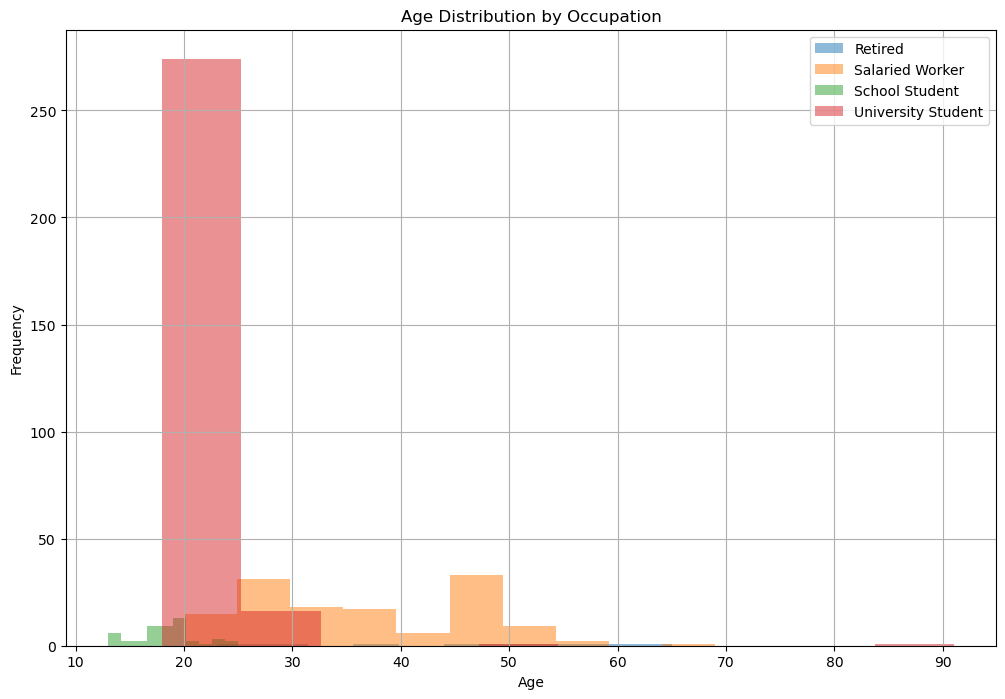

In [26]:
occupations = data['Occupation'].value_counts()
print(occupations)

print()

age_range = data['Age'].value_counts()
print(age_range)

def plot_distribution(data):
    grouped_ages = data.groupby('Occupation')['Age']
    
    for occupation, ages in grouped_ages:
        print(f"\nOccupation: {occupation}")        
        
    plt.figure(figsize=(12, 8))
    for occupation, ages in grouped_ages:
        plt.hist(ages, bins=10, alpha=0.5, label=occupation)

    plt.title('Age Distribution by Occupation')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.savefig("img/distribution.png")
    plt.show()
    
plot_distribution(data)



# Questions to Answer

1. How does the amount of time spent on social media correlate with mental health?
2. Does the platform used impact mental health differently? 
3. Are there differences in mental health impacts of social media based on demographic factors? 


## 1. How does the amount of time spent on social media correlate with mental health?

To see how the total amount of time spent on social media correlates of levels ADHD, self esteem, depression, and overall mental health, I decided to plot all of the different scores against time spent on social media. 

I first created a simple function that takes in the cleaned data, a X value (hours per day) and a Y value (the different mental metrics). 

I also then  changed the values in the 'Hours Per Day' column to make the analysis and comparisons easier. It makes sorting the column easier because Python can sort shorter strings easier than longer strings

In [27]:
def plot_scores(temp, x, y):
    fig, ax = plt.subplots()
    temp = temp.sort_values("Hours Per Day")
    ax.bar(temp[x], temp[y])
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    title = x + " vs " + y
    ax.set_title(title)
    plt.xticks(rotation=45)
    
    ys = max(temp[y]) // 2 

    plt.ylim(ys)
    plt.savefig("img/"+title+".png")

    plt.show()
    
temp = just_scores.copy()
temp.loc[temp['Hours Per Day'] == 'More than 5 hours', 'Hours Per Day'] = '5.5'
temp.loc[temp['Hours Per Day'] == 'Between 2 and 3 hours', 'Hours Per Day'] = '2.5'
temp.loc[temp['Hours Per Day'] == 'Between 3 and 4 hours', 'Hours Per Day'] = '3.5'
temp.loc[temp['Hours Per Day'] == 'Between 1 and 2 hours', 'Hours Per Day'] = '1.5'
temp.loc[temp['Hours Per Day'] == 'Between 4 and 5 hours', 'Hours Per Day'] = '4.5'
temp.loc[temp['Hours Per Day'] == 'Less than an Hour', 'Hours Per Day'] = '0.5'


Looking at ADHD Scores versus Hours Per Day, we can see that users who reported spending more than 2 hours reported higher scores of ADHD. This could be because the more time they spend on social media the lower their attention span is when doing other things because they are not feeling the same sense of reward. 

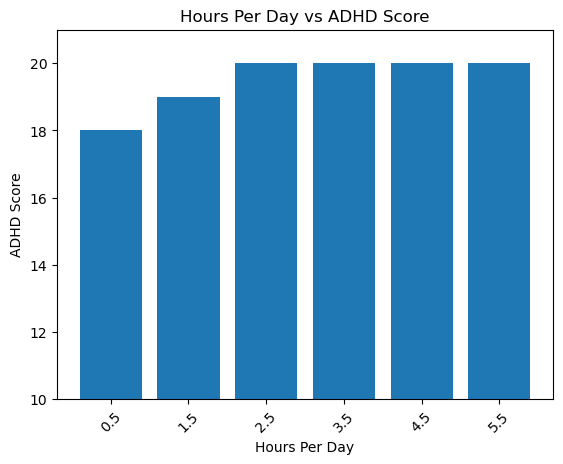

In [28]:
plot_scores(temp, "Hours Per Day", "ADHD Score")

Looking at Anxiety Scores versus Hours Per Day, we can see that users who reported more than 2 hours reported reported higher scores of anxiety. The increase in scores also seems to be pretty apparent based on time spent on social media. This could be because the more time users spent on social media, the more anxious they might get about their lives wondering why they are not doing the things they see on media. 

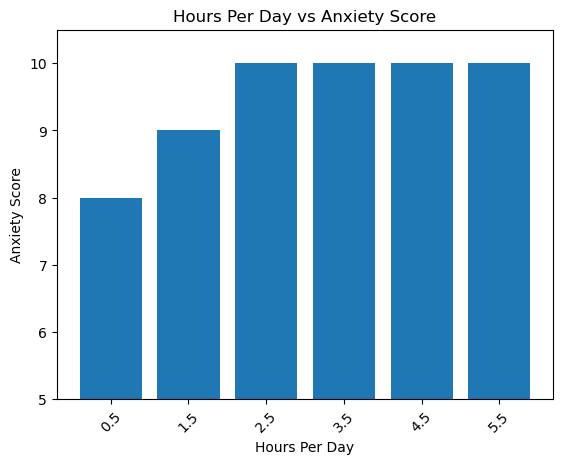

In [29]:
plot_scores(temp, "Hours Per Day", "Anxiety Score")

Looking at Self Esteem Scores versus Hours Per Day, we can see that the the longer individuals are on social media, the lower their self esteem scores as well. This could be because when they spend more time on social media, they compare themselves more to individuals who look like they are living their 'best' life.

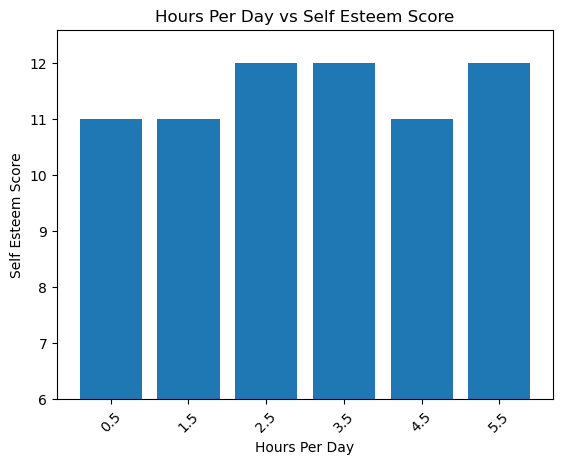

In [30]:
plot_scores(temp, "Hours Per Day", "Self Esteem Score")


Looking at Depression Score versus Hours Per Day, we can see that all hours report a pretty high depression score. The reason for this makes a little bit more sense when we look at question 3, but a guess is because a lot of this data comes from young adults ranging from 18 to 27 years old who happen to be University Students. 

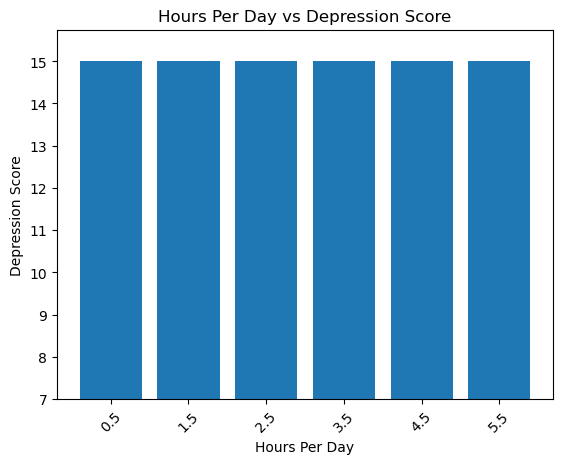

In [31]:
plot_scores(temp, "Hours Per Day", "Depression Score")


Because Total Score represents the sum of all the other mental health metrics, we can see that the same trend exists. The more time that an individual spends on social media, the worse their mental health seems to be. 

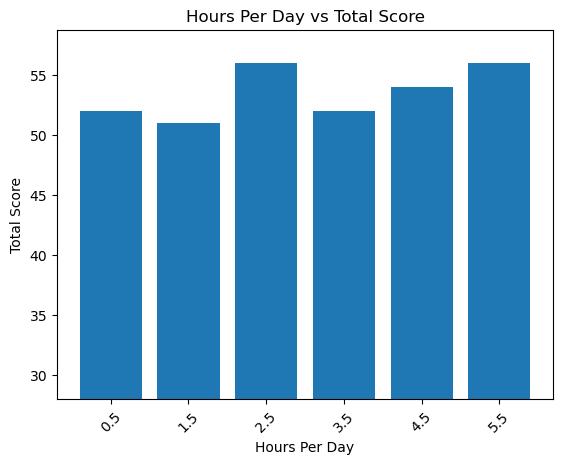

In [32]:
plot_scores(temp, "Hours Per Day", "Total Score")

## 1. How does the amount of time spent on social media correlate with mental health?

Looking from the graphs above, it is clear that the more time that an individual spends on social media, the higher levels of ADHD, anxiety, and depression they report. It was also clear that they had lower self esteem and overall had pretty [BAD MENTAL HEALTH??]

## 2. Does the platform used impact mental health differently?

To anser this question, I thought making correlation matrices and heatmaps could give us a good idea on how different platforms and content types affect mental health. I first wanted to see how different the usage was between platforms. To do this I plotted a heatmap that shows correlation between the different social media platforms. 


To do this, I made a copy of the dataset and created new binary columns based on the different platforms in the dataset. If the individual used that platform, the column was marked a 1, and if they did not use that platform, the column was marked a 0. I then turned it into a correlation matrix with the `corr()` function. I then took this data and passed it into a function I made that plots heatmaps.


In [33]:

def plot_heat_map(matrix, title):
    plt.figure(figsize=(12, 10))  
    sns.heatmap(
        matrix, 
        annot=True, 
        cmap='coolwarm', 
        fmt=".2f",  
        annot_kws={"size": 10}  
    )
    plt.title("Correlation Heatmap", fontsize=16)
    plt.savefig("img/"+title+".png")
    plt.show()
    
# Creates a list of all the social media that users reported in the dataset
# Used to plot heatmaps and compare social media with different metrics
platforms_column = data['Platforms Used']
unique_platforms = set()
for row in platforms_column:
    platforms = row.split(', ')
    unique_platforms.update(platforms)
unique_platforms_list = list(unique_platforms)


Looking at this heatmap that just looks at what platforms users are most likely to use, we can see that someone who uses 

- Reddit is more likely to use Discord, TikTok, and Twitter
- Pinterest is more likely to use Instagram, Snapchat, and TikTok
- Discord is more likely to use Reddit, Snapchat, and YouTube
- Snapchat is more likely to use Discord, Instagram, and TikTok
- YouTube is more likely to use Facebook, Instagram, and Snapchat 
- TikTok is more likely to use Instagram, Pinterest, and Snapchat 
- Twitter is more likely to use Instagram, Reddit, and YouTube
- Instagram is more likely to use Facebook, Snapchat, and YouTube
- Facebook is more likely to use Instagram, Snapchat, and YouTube 

While these findings do not tell us much about mental health, it does tell us what social medias users are likely to use. We can also see that there is a strong positive relationship between Instagram and Snapchat, Instagram and YouTube, Discord and Snapchat. 

             TikTok  Pinterest  Facebook  Snapchat  Instagram   Discord  \
TikTok     1.000000   0.224660  0.021238  0.299001   0.227052  0.163061   
Pinterest  0.224660   1.000000  0.104318  0.200469   0.226764  0.122547   
Facebook   0.021238   0.104318  1.000000  0.200370   0.228197 -0.006305   
Snapchat   0.299001   0.200469  0.200370  1.000000   0.383763  0.274618   
Instagram  0.227052   0.226764  0.228197  0.383763   1.000000  0.157490   
Discord    0.163061   0.122547 -0.006305  0.274618   0.157490  1.000000   
Twitter    0.157810   0.157839 -0.010952  0.161034   0.217106  0.152544   
Reddit     0.183349   0.113512 -0.243952  0.093561   0.010415  0.356764   
YouTube    0.067075   0.178365  0.220021  0.232176   0.279432  0.185635   

            Twitter    Reddit   YouTube  
TikTok     0.157810  0.183349  0.067075  
Pinterest  0.157839  0.113512  0.178365  
Facebook  -0.010952 -0.243952  0.220021  
Snapchat   0.161034  0.093561  0.232176  
Instagram  0.217106  0.010415  0.279432

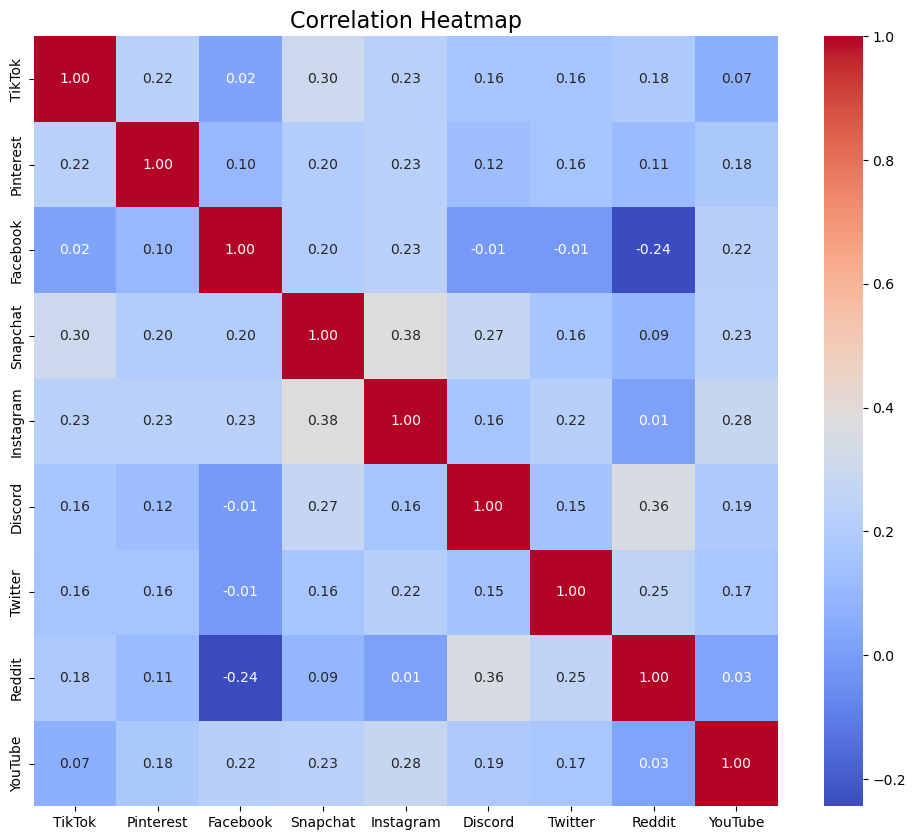

In [34]:
corelation_data_platforms = data.copy()

# Create a column for all of the different platforms found in a row 
# Mark it as 0 or 1 if someone does not or does use it 
for platform in unique_platforms_list:
    corelation_data_platforms[platform] = corelation_data_platforms['Platforms Used'].apply(lambda x: 1 if platform in x else 0)

corelation_data_platforms.drop(columns=["Platforms Used"], inplace=True)
correlation_matrix_platform = corelation_data_platforms[unique_platforms_list].corr()
print(correlation_matrix_platform)
plot_heat_map(correlation_matrix_platform, "Platforms")



Now I want to look at the correlation between the different mental health metrics and platforms used.

 We can see that the platforms that do not have a big impact on mental health are:
 - Reddit
 - Pinterest 
 - Discord
 - YouTube
 - Twitter 

These platforms have a correlation near 0 which indicates a weak linear relationship. In the real world this could be because these platforms have a reduced emphasis on social validation, provide more interest driven content, and are created on community based models. 

On the other hand, the platforms that tend to have a bigger impact on mental health are: 
- Snapchat
- TikTok
- Instagram
- Facebook

These platforms have a greater correlation which indicates a stronger linear relationship to mental health. In the real world, this could be because they have features that promote a sense of immediacy which pressures people to constantly stay online. These platforms also have a stronger emphasis on social validation and showing other people what the may be missing out on. 


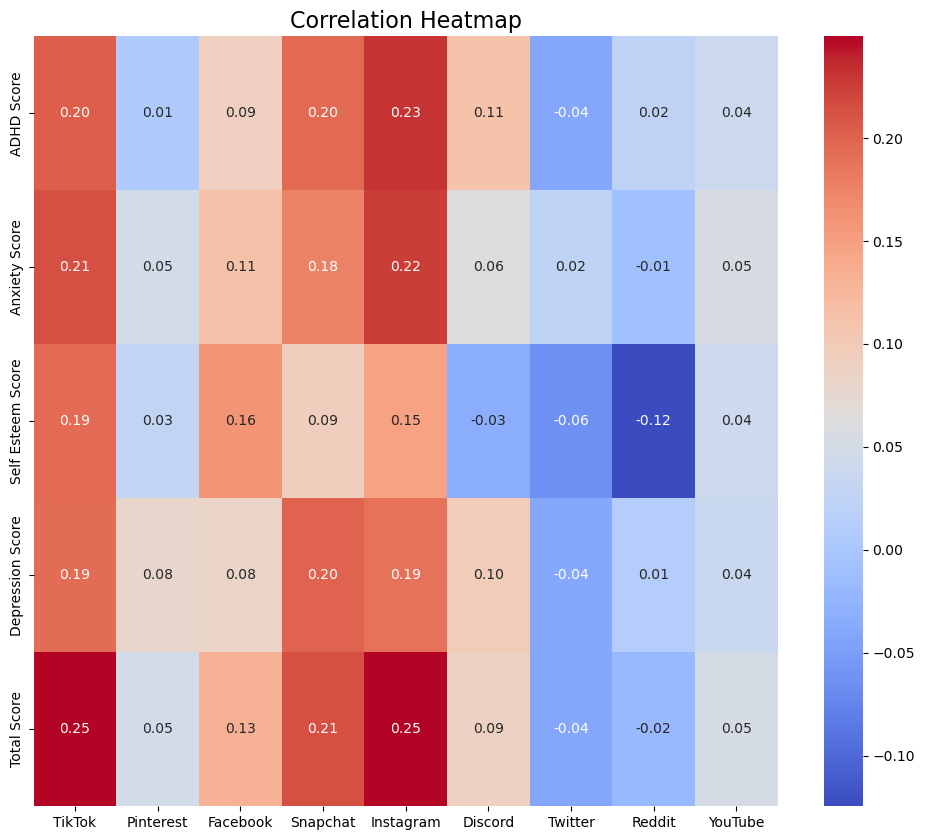

In [35]:
corelation_data = just_scores.copy()
for platform in unique_platforms_list:
    corelation_data[platform] = corelation_data['Platforms Used'].apply(lambda x: 1 if platform in x else 0)

corelation_data.drop(columns=["Platforms Used"], inplace=True)
correlation_matrix = corelation_data[unique_platforms_list + ['ADHD Score', 'Anxiety Score', 'Self Esteem Score', 'Depression Score', 'Total Score']].corr()

# Just looking at Mental Health metrics vs Platforms
scores = ['ADHD Score', 'Anxiety Score', 'Self Esteem Score', 'Depression Score', 'Total Score']
scores_vs_platforms = correlation_matrix.loc[scores, unique_platforms_list]

plot_heat_map(scores_vs_platforms, "PlatformsScores")

## 3. Are there differences in mental health impacts of social media based on demographic factors? 

To answer this question, I thought about making a linear regression model that will look at the data and try to create a model that will best fit the data. I wanted to do this because looking at the coefficients for each feature can give us some insight on what demographic factors have an impact on mental health. This

First, looking at purely demographic factors and excluding what platforms individuals used, I found that the time spent per day on social media had the biggest impact. 

Users who spent:
- More than 5 hours a day had a coefficient of 7.90
- Between 4 and 5 hours a day had a coefficient of 6.72
- Between 3 and 4 hours a day had a coefficient of 4.82
- Between 2 and 3 hours a day had a coefficient of 4.12 
- Less than an hour had a coefficient of -6.089

We can see that the more time users spend on social media, the more positive correlation there is to a worse mental health. We can also see that the less time users spend on social media the more negative correlation there is to mental health. This supports what we saw in the graphs in question 1. 

We can also see that being a University Student also has a positive correlation with mental health. This could be because of the stress students have with school and personal lives. 

In [36]:

df = just_scores.copy()

excluded_columns = ['Platforms Used', 'Total Score', 'ADHD Score', 'Depression Score', 'Self Esteem Score', 'Anxiety Score', 'Social Media User?']


X = df.drop(columns=excluded_columns)
y = df['Total Score']

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html
# I need this to select all of the string/categorical values in the dataset. 
# Strings in this case would be columns that have string values instead of ints/floats
categorical_columns = X.select_dtypes(include=['object']).columns



# https://scikit-learn.org/1.5/modules/generated/sklearn.compose.ColumnTransformer.html
# I need this to transform the categorical variables, all while ignoring the numerical values. 
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ],
    remainder='passthrough' 
)

X_transformed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

feature_names = preprocessor.get_feature_names_out()
coefficients = model.coef_
y_pred = model.predict(X_test)

feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(feature_importance.sort_values(by='Coefficient', ascending=False))

print("RMSE:", math.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))


                                       Feature  Coefficient
15        cat__Hours Per Day_More than 5 hours     7.902703
13    cat__Hours Per Day_Between 4 and 5 hours     6.720536
12    cat__Hours Per Day_Between 3 and 4 hours     4.824720
11    cat__Hours Per Day_Between 2 and 3 hours     4.120802
10          cat__Occupation_University Student     2.851392
8              cat__Occupation_Salaried Worker     1.164962
7              cat__Relationship Status_Single     0.644608
0                             cat__Gender_Male     0.231176
5   cat__Relationship Status_In a relationship     0.047519
4                          cat__Gender_unsure      0.000000
3                            cat__Gender_Trans     0.000000
6             cat__Relationship Status_Married    -0.078239
16                              remainder__Age    -0.093447
9               cat__Occupation_School Student    -0.659694
1                       cat__Gender_Non-Binary    -1.341468
2              cat__Gender_There are oth

One thing that I found interesting was that Gender had a relativly small coefficient, so I ran another model but this time excluded Gender as well. Looking at the coefficients, I saw that there wasn't much change from the previous model. 

In [37]:

df = just_scores.copy()

excluded_columns = ['Platforms Used', 'Total Score', 'ADHD Score', 'Depression Score', 'Self Esteem Score', 'Anxiety Score', 'Social Media User?', 'Gender']

X = df.drop(columns=excluded_columns)
y = df['Total Score']


# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html
# I need this to select all of the string/categorical values in the dataset. 
# Strings in this case would be columns that have string values instead of ints/floats
categorical_columns = X.select_dtypes(include=['object']).columns

# https://scikit-learn.org/1.5/modules/generated/sklearn.compose.ColumnTransformer.html
# I need this to transform the categorical variables, all while ignoring the numerical values. 
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ],
    remainder='passthrough' 
)



X_transformed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

feature_names = preprocessor.get_feature_names_out()
coefficients = model.coef_
y_pred = model.predict(X_test)

feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(feature_importance.sort_values(by='Coefficient', ascending=False))

print("RMSE:", math.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))


                                       Feature  Coefficient
10        cat__Hours Per Day_More than 5 hours     7.761775
8     cat__Hours Per Day_Between 4 and 5 hours     6.707163
7     cat__Hours Per Day_Between 3 and 4 hours     4.772925
6     cat__Hours Per Day_Between 2 and 3 hours     4.053167
5           cat__Occupation_University Student     3.026337
3              cat__Occupation_Salaried Worker     1.187451
2              cat__Relationship Status_Single     0.591686
0   cat__Relationship Status_In a relationship    -0.071389
11                              remainder__Age    -0.087499
1             cat__Relationship Status_Married    -0.115413
4               cat__Occupation_School Student    -0.449717
9         cat__Hours Per Day_Less than an Hour    -6.052467
RMSE: 7.975252915472545
R²: 0.2760166302737025


Next, I wanted to see how incorporating platforms as a feature would impact the linear regression model and the coefficients. After running this model, I saw a similar result as the first model. The time spent per day on social media still had the highest positive correlation to worse mental health. and out of all the platforms it looks like TikTok was the biggest contributor to negative mental health. 

In [38]:
df = just_scores.copy()

for platform in unique_platforms_list:
    df[platform] = df['Platforms Used'].apply(lambda x: 1 if platform in x else 0)


excluded_columns = ['Platforms Used', 'Total Score', 'ADHD Score', 'Depression Score', 'Self Esteem Score', 'Anxiety Score', 'Social Media User?', 'Gender']

X = df.drop(columns=excluded_columns)
y = df['Total Score']


# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html
# I need this to select all of the string/categorical values in the dataset. 
# Strings in this case would be columns that have string values instead of ints/floats
categorical_columns = X.select_dtypes(include=['object']).columns

# https://scikit-learn.org/1.5/modules/generated/sklearn.compose.ColumnTransformer.html
# I need this to transform the categorical variables, all while ignoring the numerical values. 
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ],
    remainder='passthrough' 
)



X_transformed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

feature_names = preprocessor.get_feature_names_out()
coefficients = model.coef_
feature_importance_all = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(feature_importance_all.sort_values(by='Coefficient', ascending=False))

y_pred = model.predict(X_test)
print("RMSE:", math.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))


                                       Feature  Coefficient
10        cat__Hours Per Day_More than 5 hours     6.642969
8     cat__Hours Per Day_Between 4 and 5 hours     5.810043
7     cat__Hours Per Day_Between 3 and 4 hours     4.045557
6     cat__Hours Per Day_Between 2 and 3 hours     3.484239
12                           remainder__TikTok     3.262112
5           cat__Occupation_University Student     2.682663
16                        remainder__Instagram     1.849807
14                         remainder__Facebook     1.345308
3              cat__Occupation_Salaried Worker     1.162444
15                         remainder__Snapchat     1.050295
2              cat__Relationship Status_Single     0.819195
11                              remainder__Age    -0.060048
1             cat__Relationship Status_Married    -0.091460
4               cat__Occupation_School Student    -0.170383
0   cat__Relationship Status_In a relationship    -0.236728
13                        remainder__Pin

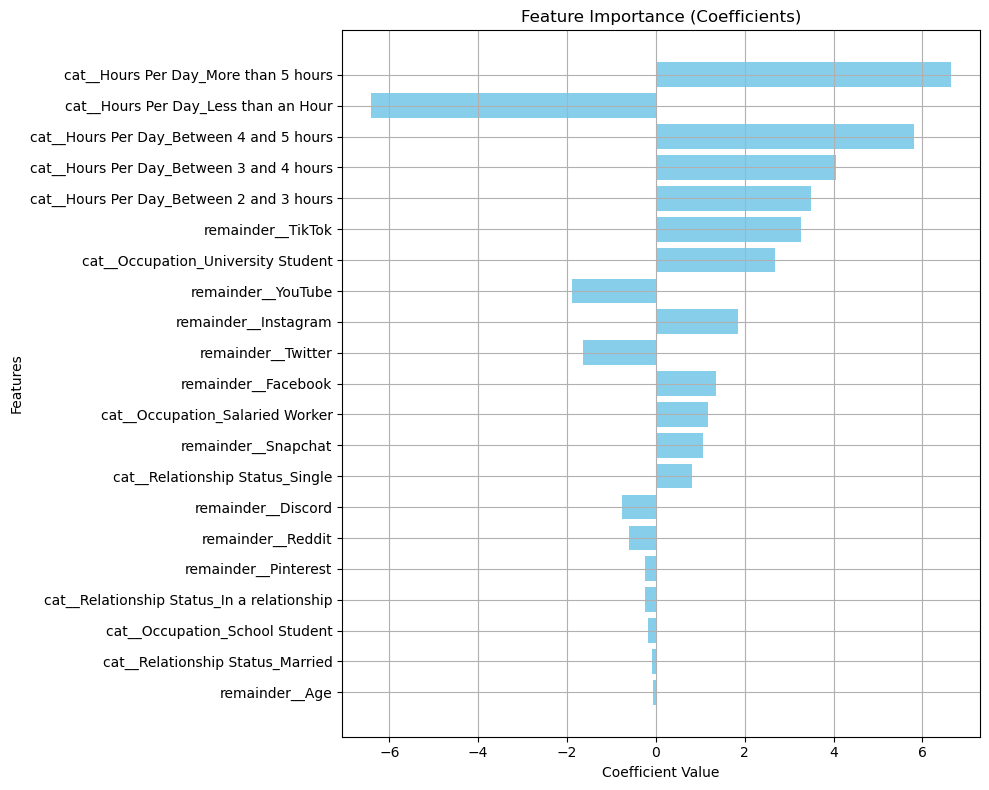

In [39]:
feature_importance_all['Cleaned_Feature'] = feature_importance_all['Feature'].str.replace(r"cat__|remainder__", "", regex=True)


feature_importance_all['Abs_Coefficient'] = feature_importance_all['Coefficient'].abs()
feature_importance_sorted = feature_importance_all.sort_values(by='Abs_Coefficient', ascending=False)
feature_importance_sorted = feature_importance_sorted.drop(columns='Abs_Coefficient')  
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_sorted['Feature'], feature_importance_sorted['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance (Coefficients)')
plt.grid(True)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.savefig("img/coefficients.png", bbox_inches="tight")
plt.tight_layout()
plt.show()




Lastly, I wanted to see how a linear regression model based just on the different platforms would perform. After training the model and looking at the coefficients, it looks like our top contributors match the results of the heatmap we saw in question 2. 

                Feature  Coefficient
4  remainder__Instagram     4.633354
0     remainder__TikTok     4.082344
3   remainder__Snapchat     2.038668
2   remainder__Facebook     0.800747
5    remainder__Discord     0.436870
1  remainder__Pinterest    -0.135907
7     remainder__Reddit    -0.838255
8    remainder__YouTube    -1.730257
6    remainder__Twitter    -2.716966
MSE: 79.66549373362459
R²: 0.09320333680974735


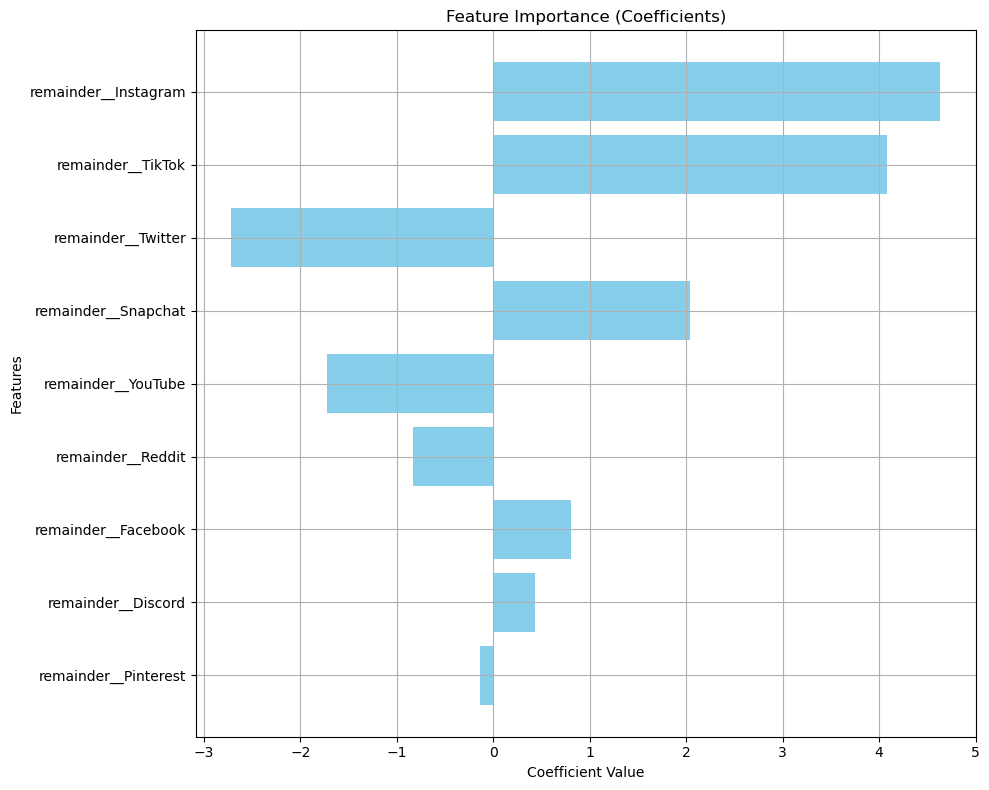

In [40]:
df = just_scores.copy()


for platform in unique_platforms_list:
    df[platform] = df['Platforms Used'].apply(lambda x: 1 if platform in x else 0)


excluded_columns = ['Platforms Used', 'Total Score', 'ADHD Score', 'Depression Score', 'Self Esteem Score', 'Anxiety Score', 'Social Media User?', 'Age', 'Gender', 'Relationship Status', 'Occupation','Hours Per Day']

X = df.drop(columns=excluded_columns)
y = df['Total Score']

categorical_columns = X.select_dtypes(include=['object']).columns


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ],
    remainder='passthrough' 
)

X_transformed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

feature_names = preprocessor.get_feature_names_out()
coefficients = model.coef_
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(feature_importance.sort_values(by='Coefficient', ascending=False))

y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


feature_importance_all['Cleaned_Feature'] = feature_importance_all['Feature'].str.replace(r"cat__|remainder__", "", regex=True)


feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance_sorted = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)
feature_importance_sorted = feature_importance_sorted.drop(columns='Abs_Coefficient')  
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_sorted['Feature'], feature_importance_sorted['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance (Coefficients)')
plt.grid(True)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.savefig("img/coefficients.png", bbox_inches="tight")
plt.tight_layout()
plt.show()




## Findings

After all this analysis, here is what I found. 

1. How does the amount of time spent on social media correlate with levels of ADHD, anxiety, self esteem, depression, and overall mental health? 

<img src="img/Hours Per Day vs Self Esteem Score.png" alt="SelfEsteem.png">
<img src="img/Hours Per Day vs ADHD Score.png" alt="ADHD.png">
<img src="img/Hours Per Day vs Anxiety Score.png" alt="Anxiety.png">
<img src="img/Hours Per Day vs Depression Score.png" alt="Depression.png">
<img src="img/Hours Per Day vs Total Score.png" alt="Total.png">

The general trends of these graphs show us that as users spend more time on social media, the higher they score on the various metrics, leading to lower mental health. 

<br>

2. Does the type of content consumed on social media impact mental health differently? 

<img src="img/PlatformsScores.png" alt="PlatformScores.png">

Creating a heatmap with the different platforms and their affect on the various mental health metrics, we can see that there are three categories. 

* Platforms in reddish/orange which had a positive impact on negative mental health 
    * These platforms were Instagram, TikTok, and Snapchat 

* Platforms in the gray/ice which had a neutral impact on negative mental health
    * These platforms were YouTube and Pinterest 

* Platforms in the blue which had a negative impact on negative mental health 
     * These platforms were Reddit and Twitter 

This can be explained by what each platform provides for their users. Snapchat, Instagram, and TikTok all have features that promote a sense of immediacy. This pressures users to be constantly online. They also have a stronger emphasis on social validation and the fear of missing out.

YouTube and Pinterest with their neutral impact, Reddit and Twitter with their negative impact can be explained by what they offer. These platforms are have a stronger emphasis on community and interest driven content. 


<br>

3. Are there differences in mental health impacts of social media based on demographic factors? 

<img src="img/coefficients.png" alt="PlatformScores.png">

Looking at purely just the dataset and the linear regression model, we can see that different factors do impact mental health differently. One thing to keep in mind is that the RMSE and R^2 values are not the necessarily the best. But this can be explained with the fact that mental health depends on more than what is present in the dataset.

Looking at the coefficients: 

The positive coefficients which lead to worse mental health 
* Spending an hour to five hours on social media 
* TikTok
* Being a student 

The negative coefficients which lead to a better mental health 
* Spending less than an hour on social media 
* YouTube 
* Twitter 

The biggest contributor to worse mental health was spending a lot of time on social media, a platform that requires a lot of social validation, and being a student. On the other hand, spending less time and more community driven platforms helped individuals. 

## Discussion 

The biggest limitation of this study is that this dataset does not look at every factor of mental health. Mental health depends on more factors than what is present in this dataset. For example, early on we saw that a big portion of this data consists of university students. But it does not take into account what might be going on in their personal lives, which plays a big role in someone's mental health. It also does not take into account what users are watching on the different platforms. We can only assume based on the general idea of what that platform usually has to offer. 



## Conclusion

Even with the limitations of this study, we can still learn somethings about building healthier digital habits. For starters, we should try to lower the amount of time we spend on social media. Looking at the coefficients extracted from the linear regression model, we can see that time spent had the biggest impact on negative mental health. Looking at the coefficients, an hour of social media seems like the perfect amount. On top of that, we should prioritize using platforms that push more community and interest driven content. This is because you will feel more motivated to see things that you are curious and interested about, instead of seeking social validation. 

